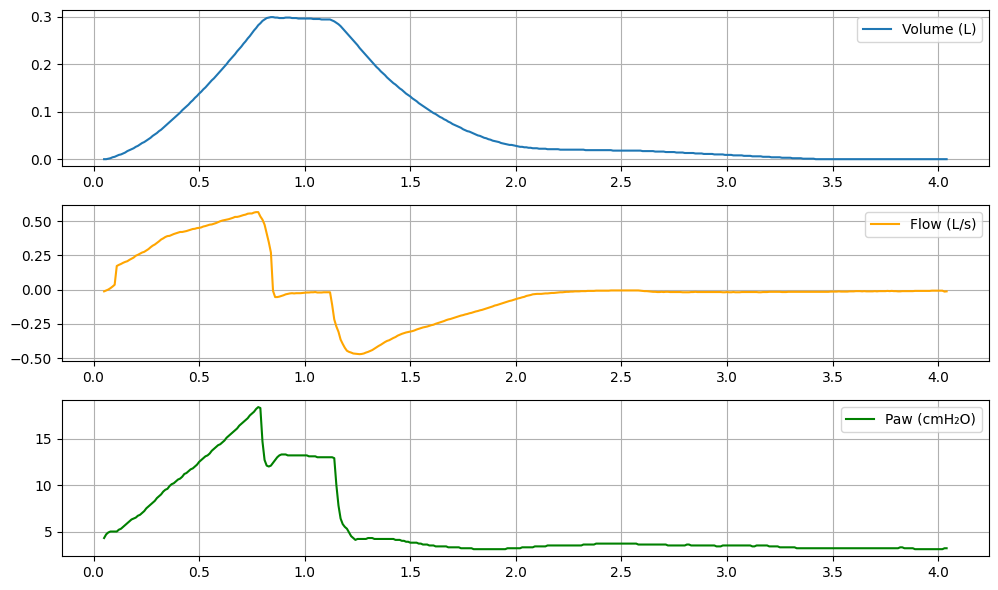

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the data (Paw, Flow, Volume)
data = np.loadtxt("Supplementary/data/case2VCAC2.txt")  # update path if needed
Paw, Flow, Volume = data[:, 0], data[:, 1], data[:, 2]

# Time vector assuming 100 Hz sampling
fs = 100
t = np.linspace(0, len(Paw) / fs, len(Paw))

# Select 3 breaths (~12 sec) manually (adjust start/end if needed)
start_idx = 5   # Start at sample 5 to skip initial transient
end_idx = min(start_idx + 400, len(t))  # 4 seconds = 400 samples

# Extract segments
t_seg = t[start_idx:end_idx]
V_seg = Volume[start_idx:end_idx]
Flow_seg = Flow[start_idx:end_idx]
Paw_seg = Paw[start_idx:end_idx]

# Plot
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t_seg, V_seg, label="Volume (L)")
plt.grid(), plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t_seg, Flow_seg, label="Flow (L/s)", color='orange')
plt.grid(), plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t_seg, Paw_seg, label="Paw (cmH₂O)", color='green')
plt.grid(), plt.legend()

plt.tight_layout()

plt.show()

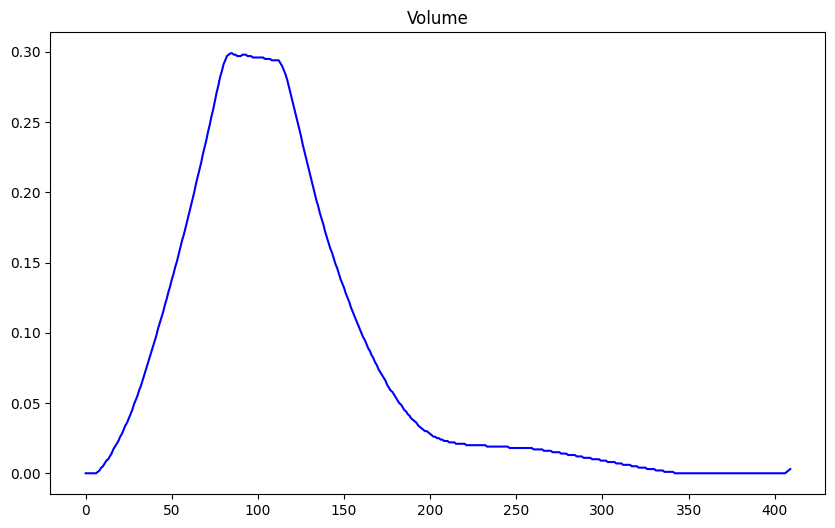

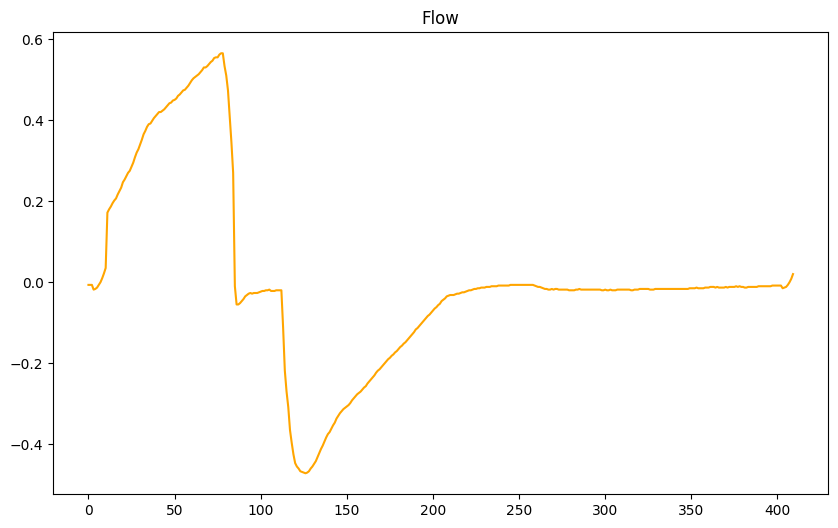

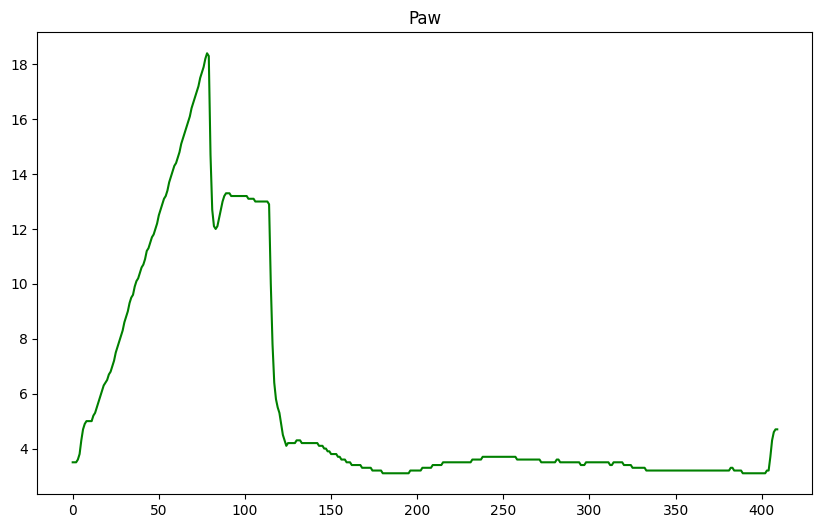

In [2]:
lim=410
plt.figure(figsize=(10, 6))
plt.plot(Volume[:lim],color='blue')
plt.title('Volume')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Flow[:lim],color='orange')
plt.title('Flow')
plt.show()



plt.figure(figsize=(10, 6))
plt.plot(Paw[:lim],color='green')
plt.title('Paw')
plt.show()


### Fit equation 1

$$
P_{aw}(t) = E \cdot V(t) + R \cdot V'(t) + P_0
$$

Fitted Parameters:
E = 30.54, R = 10.96, P0 = 3.28
Mean Squared Error (MSE) = 0.4294
R-squared (R²) = 0.9748


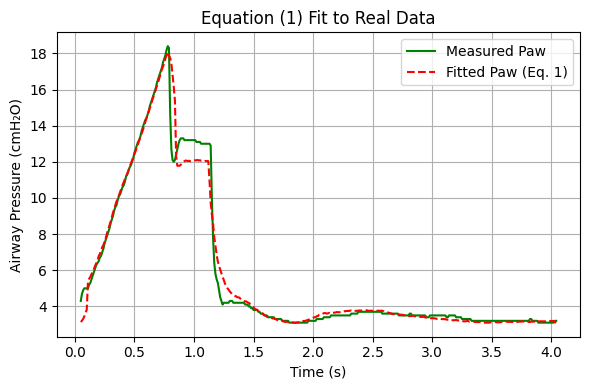

In [20]:
from sklearn.metrics import mean_squared_error, r2_score


# Load the data (Paw, Flow, Volume)
data = np.loadtxt("Supplementary/data/case2VCAC2.txt")  # update path if needed
Paw, Flow, Volume = data[:, 0], data[:, 1], data[:, 2]

# Time vector assuming 100 Hz sampling
fs = 100
t = np.linspace(0, len(Paw) / fs, len(Paw))

# Select 3 breaths (~12 sec) manually (adjust start/end if needed)
start_idx = 5   # Start at sample 5 to skip initial transient
end_idx = min(start_idx + 400, len(t))  # 4 seconds = 400 samples

# Extract segments
t_seg = t[start_idx:end_idx]
V_seg = Volume[start_idx:end_idx]
Flow_seg = Flow[start_idx:end_idx]
Paw_seg = Paw[start_idx:end_idx]


from scipy.optimize import curve_fit

# Define Eq. 1
def eq1(X, E, R, P0):
    V, Flow = X
    return E * V + R * Flow + P0

# Fit the model to the selected segment
popt, _ = curve_fit(eq1, (V_seg, Flow_seg), Paw_seg)

# Generate fitted Paw
Paw_fit = eq1((V_seg, Flow_seg), *popt)



mse = mean_squared_error(Paw_seg, Paw_fit)
r2 = r2_score(Paw_seg, Paw_fit)

# Print results
print(f"Fitted Parameters:\nE = {popt[0]:.2f}, R = {popt[1]:.2f}, P0 = {popt[2]:.2f}")
E_true=popt[0]
R_true = popt[1]
P0_true = popt[2]     
print(f"Mean Squared Error (MSE) = {mse:.4f}")
print(f"R-squared (R²) = {r2:.4f}")

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(t_seg, Paw_seg, label="Measured Paw", color="green")
plt.plot(t_seg, Paw_fit, label="Fitted Paw (Eq. 1)", linestyle="--", color="red")
plt.title("Equation (1) Fit to Real Data")
plt.xlabel("Time (s)")
plt.ylabel("Airway Pressure (cmH₂O)")
plt.grid(), plt.legend()
plt.tight_layout()
plt.show()


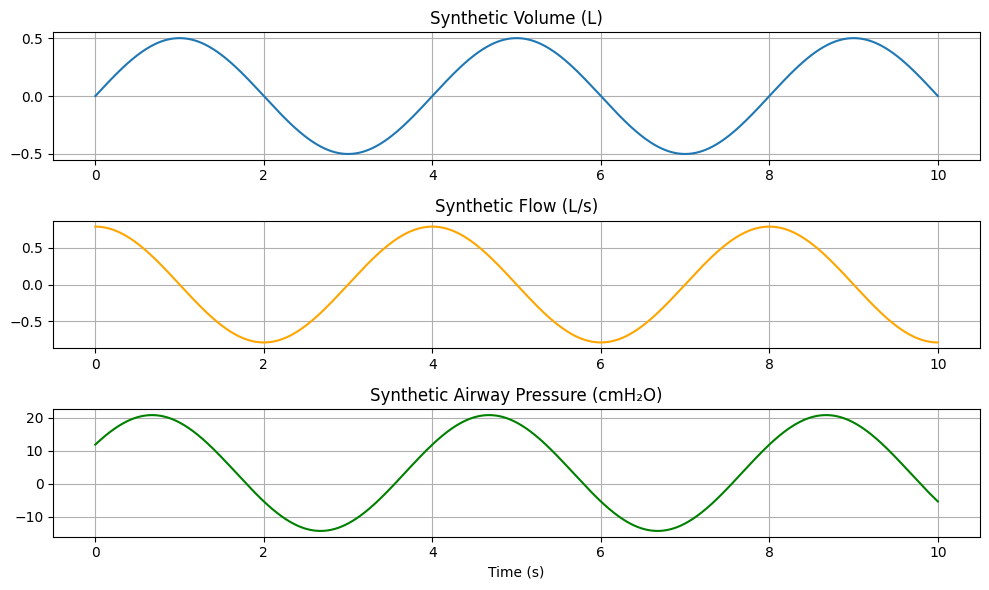

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Time settings
T = 10  # duration in seconds
fs = 100  # sampling frequency
t = np.linspace(0, T, T * fs)

# Volume signal: sinusoidal breathing (0.5L amplitude, 15 breaths/min)
A = 0.5
f_breath = 0.25  # Hz (15 bpm)
V = A * np.sin(2 * np.pi * f_breath * t)

# Flow = dV/dt
Flow = np.gradient(V, t)

# Equation (1) parameters
# E, R, P0 should come from estimated


# Simulate Paw using Equation (1)
#Paw = E * V + R * Flow + P0
X=(V,Flow)
Paw=eq1(X, E_true, R_true, P0_true)

# Plot the synthetic signals
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, V)
plt.title("Synthetic Volume (L)")
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, Flow, color='orange')
plt.title("Synthetic Flow (L/s)")
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, Paw, color='green')
plt.title("Synthetic Airway Pressure (cmH₂O)")
plt.xlabel("Time (s)")
plt.grid()

plt.tight_layout()
plt.show()

In [22]:
# from paper
'''
E_true=26.1130
R_true=7.1716  
P0_true=3.3972 
'''

'\nE_true=26.1130\nR_true=7.1716  \nP0_true=3.3972 \n'

In [23]:
## just try PINN to get the parameters back

Epoch 0 | Loss: 162.6594 | E: 1.01, R: 1.01, P0: 0.01
Epoch 200 | Loss: 122.2232 | E: 2.97, R: 2.92, P0: 1.82
Epoch 400 | Loss: 95.3194 | E: 4.84, R: 4.63, P0: 3.16
Epoch 600 | Loss: 76.9514 | E: 6.64, R: 6.12, P0: 4.01
Epoch 800 | Loss: 63.4590 | E: 8.37, R: 7.38, P0: 4.43
Epoch 1000 | Loss: 52.7964 | E: 10.04, R: 8.42, P0: 4.56
Epoch 1200 | Loss: 44.0075 | E: 11.66, R: 9.23, P0: 4.54
Epoch 1400 | Loss: 36.6115 | E: 13.23, R: 9.85, P0: 4.45
Epoch 1600 | Loss: 30.3090 | E: 14.74, R: 10.29, P0: 4.35
Epoch 1800 | Loss: 24.8980 | E: 16.20, R: 10.58, P0: 4.25

Recovered Parameters:
E:  17.60 (true 30.53658983385133)
R:  10.76 (true 10.956402314718252)
P0: 4.15 (true 3.283293091435434)


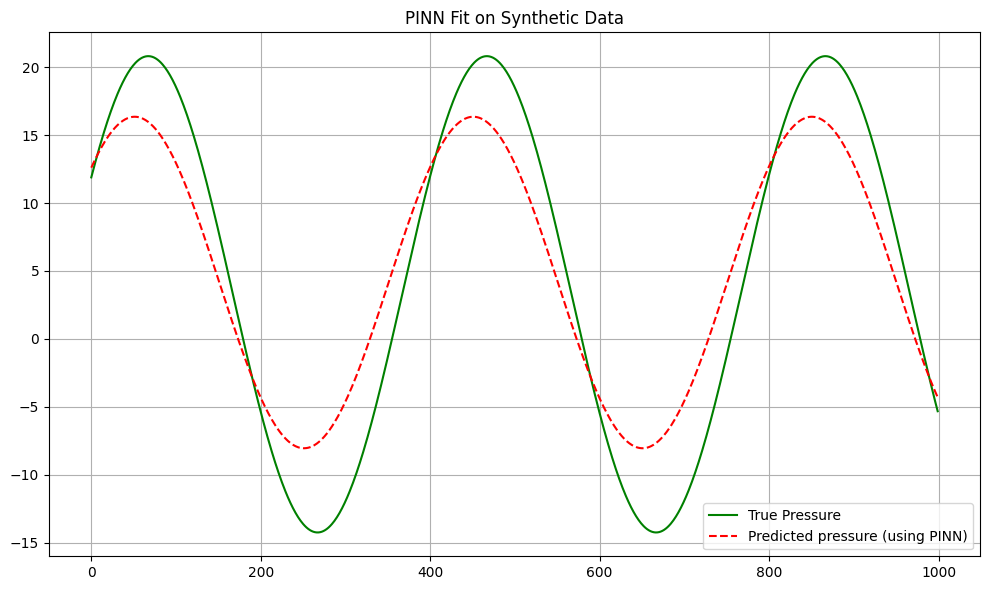

In [30]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt



# ==== Prepare PyTorch tensors ====
t_torch = torch.tensor(t, dtype=torch.float32).view(-1, 1)
V_torch = torch.tensor(V, dtype=torch.float32).view(-1, 1)
Flow_torch = torch.tensor(Flow, dtype=torch.float32).view(-1, 1)
Paw_torch = torch.tensor(Paw, dtype=torch.float32).view(-1, 1)

# ==== Define trainable parameters ====
E = torch.tensor([1.0], dtype=torch.float32, requires_grad=True)
R = torch.tensor([1.0], dtype=torch.float32, requires_grad=True)
P0 = torch.tensor([0.0], dtype=torch.float32, requires_grad=True)

# ==== Define optimizer ====
optimizer = torch.optim.Adam([E, R, P0], lr=1e-2)
num_epochs=2000

# ==== Training loop ====
loss_history = []
for epoch in range(num_epochs):
    optimizer.zero_grad()

    # Predicted Paw
    Paw_pred = E * V_torch + R * Flow_torch + P0

    # Loss = MSE
    loss = torch.mean((Paw_pred - Paw_torch)**2)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

    if epoch % 200 == 0:
        print(f"Epoch {epoch} | Loss: {loss.item():.4f} | E: {E.item():.2f}, R: {R.item():.2f}, P0: {P0.item():.2f}")

# ==== Final Results ====
print("\nRecovered Parameters:")
print(f"E:  {E.item():.2f} (true {E_true})")
print(f"R:  {R.item():.2f} (true {R_true})")
print(f"P0: {P0.item():.2f} (true {P0_true})")

# ==== Plotting ====
plt.figure(figsize=(10, 6))
plt.plot(Paw, label="True Pressure", color='green')
plt.plot((E * V_torch + R * Flow_torch + P0).detach().numpy(), '--', label="Predicted pressure (using PINN)", color='red')
plt.title("PINN Fit on Synthetic Data")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()